In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 逻辑回归解决多分类问题
iris = datasets.load_iris()
y = iris.target
X = iris.data[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [2]:
# 咱们先顶一个一个函数来画决策边界
def plot_decision_boundary(model, axis):
  
    s1 = np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100))
    s2 = np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)) 
    x0, x1 = np.meshgrid(
        s1, s2
    )
    r1 = x0.ravel()
    r2 = x1.ravel()
    X_new = np.c_[r1, r2]
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#ef9a9a', '#fff59d', '#90caf9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

In [3]:

# OVR
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.7368421052631579

<ipython-input-2-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


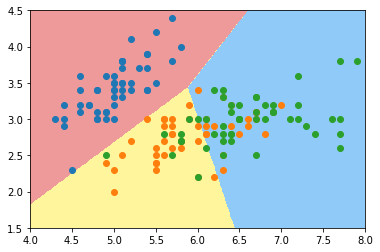

In [4]:
plot_decision_boundary(log_reg,  axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [5]:
# 添加multi_class='multinomial'使用OvO,使用OvO时需要添加参数solver='newton-cg'
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")

In [6]:
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7368421052631579

<ipython-input-2-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


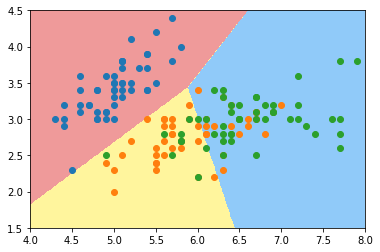

In [7]:
plot_decision_boundary(log_reg2,  axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [ ]:
# 使用OvO类扩展二分类算法至多分类问题
from sklearn.multiclass import OneVsRestClassifier
ovo = OneVsRestClassifier(log_reg)
ovo.fit(X_train,y_train)
print(ovo.score(X_test,y_test))